# Time Series Dataset untuk Prediksi

## Pengambilan Data NO₂ Sentinel-5P untuk Wilayah MODO melalui openEO

1. Koneksi ke OpenEO (Copernicus Data Space)

Bagian pertama digunakan untuk terhubung ke server OpenEO, yaitu platform yang menyediakan akses ke berbagai dataset satelit milik Copernicus.
Adek melakukan autentikasi lewat metode OIDC (OpenID Connect) agar bisa mengakses data yang disediakan.

Intinya, tahap ini seperti “login” ke server data satelit supaya bisa mengambil data dari sana.

2. Menentukan Area of Interest (AOI)

Tahap ini mendefinisikan wilayah yang ingin dianalisis.
Wilayah tersebut ditentukan menggunakan koordinat geografis (longitude dan latitude) dalam bentuk poligon tertutup.

- Koordinat yang Adek masukkan menunjukkan area kecil di sekitar:

- Bujur (longitude): sekitar 112.145 – 112.153

- Lintang (latitude): sekitar -7.247 – -7.237

Artinya, wilayah ini kemungkinan terletak di sekitar Sumenep, Jawa Timur.
Poligon tersebut berfungsi sebagai batas untuk menentukan area pengambilan data.

3. Memuat Data Satelit Sentinel-5P

Setelah wilayahnya ditentukan, tahap berikutnya adalah memuat data satelit.
Dataset yang digunakan adalah SENTINEL_5P_L2, yang berisi pengukuran berbagai gas di atmosfer, salah satunya NO₂ (Nitrogen Dioksida).

Parameter yang digunakan:

- temporal_extent → waktu pengamatan dari 15 Oktober 2023 sampai 19 Oktober 2025

- spatial_extent → batas wilayah sesuai AOI

- bands → hanya mengambil band NO2

Tahap ini seperti mengambil semua data pengukuran NO₂ dari satelit di lokasi dan waktu yang ditentukan.

4. Menghitung Rata-rata Harian

Data satelit biasanya direkam beberapa kali dalam satu hari.
Maka, bagian ini berfungsi untuk menggabungkan semua data harian dan menghitung nilai rata-ratanya per hari.

Dengan begitu, hasilnya bukan lagi per citra atau waktu pengambilan, tapi satu nilai rata-rata untuk setiap tanggal dalam periode dua tahun itu.

5. Menghitung Rata-rata Spasial (di Dalam AOI)

Setelah nilai harian dihitung, langkah selanjutnya adalah menghitung rata-rata secara spasial, yaitu rata-rata nilai dari seluruh piksel di dalam poligon AOI.

Tujuannya:

Mendapatkan satu angka representatif per hari, yang menggambarkan konsentrasi rata-rata NO₂ di seluruh area yang Adek tentukan.

Hasil tahap ini biasanya berupa seri waktu (time series):
tanggal → nilai rata-rata NO₂.


6. Menjalankan dan Menyimpan Hasil

Langkah ini menjalankan seluruh proses di server OpenEO, bukan di komputer lokal (karena ukuran datanya besar).

Hasil akhirnya disimpan dalam file berformat .nc (NetCDF) — format standar untuk data atmosfer, iklim, dan geospasial.
File ini bisa dibuka di software seperti:

- Panoply (NASA)

- QGIS

- Python (xarray / netCDF4)



In [1]:
!pip install openeo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.1/335.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.10.1
    Uninstalling xarray-2025.10.1:
      Successfully uninstalled xarray-2025.10.1


In [3]:
import openeo

connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

aoi = {
    "type": "Polygon",
        "coordinates": [
        [
            [
                112.14,
                -7.23
            ],
            [
                112.14,
                -7.24
            ],
            [
                112.15,
                -7.24
            ],
            [
                112.15,
                -7.23
            ],
            [
                112.14,
                -7.23
            ]
        ]
    ],
    "type": "Polygon"
}

s5p_no2 = connection.load_collection(
    "SENTINEL_5P_L2",
    temporal_extent=["2023-10-15", "2025-10-19"],
    spatial_extent={
        "west": 112.14,
        "south": -7.24,
        "east": 112.15,
        "north": -7.23
    },
    bands=["NO2"]
)

s5p_no2_daily = s5p_no2.aggregate_temporal_period(
    period="day",
    reducer="mean"
)

s5p_no2_aoi = s5p_no2_daily.aggregate_spatial(
    geometries=aoi,
    reducer="mean"
)

job = s5p_no2.execute_batch(title="NO2 in Modo", outputfile="NO2_in_Modo.nc")


Authenticated using refresh token.
0:00:00 Job 'j-2510221359314de29f6be7a02ea36199': send 'start'
0:00:13 Job 'j-2510221359314de29f6be7a02ea36199': created (progress 0%)
0:00:18 Job 'j-2510221359314de29f6be7a02ea36199': created (progress 0%)
0:00:25 Job 'j-2510221359314de29f6be7a02ea36199': created (progress 0%)
0:00:33 Job 'j-2510221359314de29f6be7a02ea36199': created (progress 0%)
0:00:43 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:00:56 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:01:11 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:01:31 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:01:55 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:02:25 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:03:03 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:03:50 Job 'j-2510221359314de29f6be7a02ea36199': running (progress N/A)
0:04:48 Job 'j-2510221359314de

## Membaca File NetCDF dan Menampilkan Data NO₂

Setelah proses pengolahan data melalui OpenEO selesai dan hasilnya diekspor ke file NO2_in_Modo.nc, langkah selanjutnya adalah membaca isi file tersebut dan melihat variabel-variabel yang tersedia di dalamnya.

Format NetCDF (.nc) merupakan format umum untuk menyimpan data atmosfer dan penginderaan jauh, karena mampu menampung data dalam bentuk multidimensi seperti ruang (lintang–bujur) dan waktu. Untuk mengakses file ini, digunakan pustaka netCDF4 di Python.

Langkah-langkah yang dilakukan dalam kode:

1. Membuka file .nc menggunakan netCDF4.Dataset
File hasil ekspor dibuka dari direktori /content/NO2_in_Modo.nc sehingga seluruh informasi metadata dan variabel yang tersimpan dapat diakses melalui objek dataset (ds).

2. Menampilkan daftar variabel yang tersedia
Dengan perintah ds.variables.keys(), ditampilkan semua nama variabel di dalam file. Langkah ini bertujuan untuk mengenali variabel penting seperti konsentrasi NO₂ dan waktu pengamatannya (t).

3. Mengambil data variabel NO₂ dan waktu (t)
Nilai dari kedua variabel tersebut diekstrak menggunakan ds.variables["NO2"][:] dan ds.variables["t"][:].
Data NO₂ berisi nilai konsentrasi gas yang direkam satelit, sedangkan t berisi informasi waktu pengamatan.

4. Mengonversi waktu numerik menjadi format tanggal
Karena variabel waktu biasanya tersimpan sebagai angka offset (misalnya “hours since 2000-01-01”), atribut units pada variabel t digunakan untuk mengubah nilai tersebut menjadi format tanggal (datetime) menggunakan fungsi netCDF4.num2date().
Jika atribut units tidak tersedia, data waktu akan ditampilkan apa adanya.

5. Menampilkan contoh data pertama
Untuk memastikan file berhasil dibaca, kode menampilkan hingga 10 baris pertama berisi tanggal pengamatan dan nilai konsentrasi NO₂ yang bersesuaian.
Hasil ini memberi gambaran awal tentang data yang tersimpan di dalam file NetCDF.


In [4]:
!pip install netCDF4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00


In [5]:
import netCDF4

file_path = "/content/NO2_in_Modo.nc"
ds = netCDF4.Dataset(file_path)

print(" Variabel dalam file:")
print(ds.variables.keys())

no2 = ds.variables["NO2"][:]

time = ds.variables["t"][:]

try:
    time_units = ds.variables["t"].units
    dates = netCDF4.num2date(time, units=time_units)
except Exception:
    dates = time
print("\n📅 Contoh data pertama:")
for i in range(min(10, len(no2))):
    print(f"{dates[i]} | NO2: {no2[i]}")

 Variabel dalam file:
dict_keys(['t', 'x', 'y', 'crs', 'NO2'])

📅 Contoh data pertama:
2023-10-15 00:00:00 | NO2: [[--]]
2023-10-16 00:00:00 | NO2: [[1.7497904991614632e-05]]
2023-10-17 00:00:00 | NO2: [[2.388028042332735e-05]]
2023-10-18 00:00:00 | NO2: [[4.108377106604166e-05]]
2023-10-19 00:00:00 | NO2: [[3.235277836211026e-05]]
2023-10-20 00:00:00 | NO2: [[3.437312989262864e-05]]
2023-10-21 00:00:00 | NO2: [[--]]
2023-10-22 00:00:00 | NO2: [[--]]
2023-10-23 00:00:00 | NO2: [[6.008174386806786e-05]]
2023-10-24 00:00:00 | NO2: [[--]]


## Konversi Data NetCDF ke CSV untuk Analisis Lebih Lanjut

Kode berikut digunakan untuk membaca hasil keluaran data Sentinel-5P dalam format NetCDF (.nc) yang telah diekspor dari layanan openEO untuk wilayah Modo. Pertama, file NO2_in_Modo.nc dibuka menggunakan pustaka netCDF4, kemudian seluruh variabel di dalamnya ditampilkan untuk memastikan keberadaan variabel yang dibutuhkan, yaitu waktu ("t") dan konsentrasi NO₂ ("NO2").

Selanjutnya, variabel waktu dikonversi dari format numerik (offset waktu, misalnya “days since 1970-01-01”) menjadi format tanggal sebenarnya menggunakan fungsi netCDF4.num2date(). Proses ini memungkinkan data waktu lebih mudah dibaca dan digunakan dalam analisis.

Setelah itu, nilai konsentrasi NO₂ diolah dengan menghitung rata-rata spasialnya menggunakan fungsi np.nanmean(). Langkah ini dilakukan agar setiap waktu pengamatan hanya memiliki satu nilai rata-rata NO₂, sehingga data menjadi lebih sederhana untuk dianalisis.

Data hasil perhitungan kemudian digabungkan dengan informasi waktu ke dalam sebuah DataFrame menggunakan pustaka pandas. Struktur tabel ini mempermudah proses pengolahan lebih lanjut seperti visualisasi tren atau analisis statistik. Terakhir, hasilnya diekspor ke dalam file CSV dengan nama NO2_Modo.csv, dan beberapa baris pertama dari tabel ditampilkan untuk memverifikasi bahwa proses konversi dan penyimpanan telah berhasil dilakukan.

In [6]:
import netCDF4
import pandas as pd
import numpy as np

file_path = "/content/NO2_in_Modo.nc"
ds = netCDF4.Dataset(file_path)

print(ds)

print(ds.variables.keys())

time_var = ds.variables["t"][:]
no2_var = ds.variables["NO2"][:]

time_units = ds.variables["t"].units
dates = netCDF4.num2date(time_var, units=time_units)

if no2_var.ndim > 1:
    no2_mean = np.nanmean(no2_var, axis=tuple(range(1, no2_var.ndim)))
else:
    no2_mean = no2_var

df = pd.DataFrame({
    "time": dates,
    "NO2": no2_mean
})

df.to_csv("/content/NO2_Modo.csv", index=False)
print(" File NO2_Modo.csv berhasil dibuat.")
print(df.head())

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.9
    institution: Copernicus Data Space Ecosystem openEO API - 0.68.0a10.dev20250930+2976
    description: 
    title: 
    dimensions(sizes): t(729), y(1), x(1)
    variables(dimensions): int32 t(t), float64 x(x), float64 y(y), |S1 crs(), float32 NO2(t, y, x)
    groups: 
dict_keys(['t', 'x', 'y', 'crs', 'NO2'])
 File NO2_Modo.csv berhasil dibuat.
                  time       NO2
0  2023-10-15 00:00:00       NaN
1  2023-10-16 00:00:00  0.000017
2  2023-10-17 00:00:00  0.000024
3  2023-10-18 00:00:00  0.000041
4  2023-10-19 00:00:00  0.000032


## Transformasi Data NO₂ Menjadi Bentuk Supervised Learning

Bagian kode ini digunakan untuk menyiapkan data NO₂ dalam format time series agar bisa digunakan dalam pemodelan prediksi (seperti regresi atau machine learning berbasis deret waktu). Berikut penjelasan langkah-langkahnya:

1. Membaca data CSV hasil konversi sebelumnya
   File NO2_Modo.csv yang berisi data waktu dan konsentrasi NO₂ dibaca menggunakan pustaka pandas. Data ini kemudian diolah agar bisa dianalisis dalam bentuk deret waktu (time series).

2. Mengubah kolom waktu menjadi format datetime
   Kolom time dikonversi menjadi tipe data datetime agar bisa dikenali sebagai indeks waktu. Proses ini penting untuk analisis deret waktu karena setiap nilai NO₂ akan dikaitkan dengan waktu pengamatannya.

3. Menetapkan kolom waktu sebagai indeks
   Setelah dikonversi, kolom time dijadikan indeks utama pada tabel. Dengan begitu, setiap baris data dapat merepresentasikan kondisi NO₂ pada waktu tertentu.

4. Mengisi nilai hilang (missing values) dengan interpolasi waktu
   Jika ada data NO₂ yang kosong (NaN), nilainya diisi menggunakan metode interpolasi berbasis waktu (method='time'), yaitu memperkirakan nilai yang hilang berdasarkan tren nilai sebelum dan sesudahnya.

5. Mengecek jumlah data yang masih kosong
   Setelah interpolasi, dilakukan pengecekan untuk memastikan tidak ada lagi data yang hilang.

6. Membangun struktur data terawasi (supervised learning)
   Tujuan bagian ini adalah mengubah data deret waktu menjadi bentuk input-output yang bisa digunakan oleh model prediksi.

    Variabel n_lags = 4 artinya model akan mempertimbangkan 4 hari sebelumnya untuk memprediksi nilai hari ini.
    Dibuat kolom baru seperti NO2(t-4), NO2(t-3), NO2(t-2), dan NO2(t-1) sebagai fitur (input), serta NO2(t) sebagai target (output).

7. Menghapus baris yang memiliki nilai kosong akibat pergeseran (shift)
   Karena pembentukan lag menyebabkan sebagian data awal tidak memiliki nilai lengkap, baris-baris kosong tersebut dihapus agar dataset bersih dan siap dipakai untuk pelatihan model.

8. Menampilkan cuplikan dan informasi dataset hasil transformasi
   Beberapa baris pertama dari dataset baru ditampilkan untuk memastikan hasilnya benar. Dataset ini sekarang sudah berbentuk supervised, siap digunakan untuk model prediksi konsentrasi NO₂ berdasarkan data historis.


In [8]:
import pandas as pd

df = pd.read_csv("/content/NO2_Modo.csv")

df['time'] = pd.to_datetime(df['time'], errors='coerce')

df = df.set_index('time')

df['NO2'] = df['NO2'].interpolate(method='time')

print(df.isna().sum())

n_lags = 4

supervised = pd.DataFrame()

for i in range(n_lags, 0, -1):
    supervised[f'NO2(t-{i})'] = df['NO2'].shift(i)

supervised['NO2(t)'] = df['NO2']

supervised = supervised.dropna()

print(" Head of Data:")
print(supervised.head())

print("")
print(" Data info:")
supervised.info

NO2    1
dtype: int64
 Head of Data:
            NO2(t-4)  NO2(t-3)  NO2(t-2)  NO2(t-1)    NO2(t)
time                                                        
2023-10-20  0.000017  0.000024  0.000041  0.000032  0.000034
2023-10-21  0.000024  0.000041  0.000032  0.000034  0.000043
2023-10-22  0.000041  0.000032  0.000034  0.000043  0.000052
2023-10-23  0.000032  0.000034  0.000043  0.000052  0.000060
2023-10-24  0.000034  0.000043  0.000052  0.000060  0.000058

 Data info:


<bound method DataFrame.info of             NO2(t-4)  NO2(t-3)  NO2(t-2)  NO2(t-1)    NO2(t)
time                                                        
2023-10-20  0.000017  0.000024  0.000041  0.000032  0.000034
2023-10-21  0.000024  0.000041  0.000032  0.000034  0.000043
2023-10-22  0.000041  0.000032  0.000034  0.000043  0.000052
2023-10-23  0.000032  0.000034  0.000043  0.000052  0.000060
2023-10-24  0.000034  0.000043  0.000052  0.000060  0.000058
...              ...       ...       ...       ...       ...
2025-10-14  0.000046  0.000020 -0.000006  0.000027  0.000060
2025-10-15  0.000020 -0.000006  0.000027  0.000060  0.000060
2025-10-16 -0.000006  0.000027  0.000060  0.000060  0.000060
2025-10-17  0.000027  0.000060  0.000060  0.000060  0.000060
2025-10-18  0.000060  0.000060  0.000060  0.000060  0.000060

[724 rows x 5 columns]>

## Normalisasi Data untuk Model Supervised Learning

Bagian kode ini berfungsi untuk menormalisasi data sebelum digunakan dalam proses pemodelan prediksi. Normalisasi dilakukan agar seluruh variabel berada dalam skala yang sama, sehingga model machine learning dapat bekerja lebih stabil dan efisien. Berikut penjelasan langkah-langkahnya secara rinci:

1. Memisahkan fitur (X) dan target (y)
Dari dataset terawasi sebelumnya, dipilih empat kolom NO2(t-4), NO2(t-3), NO2(t-2), dan NO2(t-1) sebagai fitur input (X), sedangkan kolom NO2(t) dijadikan target output (y) yang akan diprediksi.

2. Membuat objek normalisasi (MinMaxScaler)
Digunakan fungsi MinMaxScaler dari pustaka scikit-learn untuk melakukan normalisasi min–max. Teknik ini mengubah semua nilai menjadi berada pada rentang 0 hingga 1.


Hal ini penting karena variabel dengan skala besar (misalnya 1000) dapat mendominasi variabel lain jika tidak dinormalisasi.

3. Menerapkan normalisasi pada fitur input
Data fitur X kemudian diubah menggunakan metode fit_transform(). Proses ini menghitung nilai minimum dan maksimum setiap kolom, lalu mengonversi semua nilainya agar sesuai dengan skala 0–1.

4. Mengembalikan indeks agar tidak hanya berdasarkan waktu
Dataset supervised di-reset index-nya agar memiliki urutan baris yang eksplisit, bukan lagi berbasis waktu. Ini memudahkan proses pelatihan model yang biasanya membutuhkan indeks numerik.

5. Membuat DataFrame baru hasil normalisasi
Hasil transformasi yang berupa array kemudian dikonversi kembali menjadi DataFrame dengan nama kolom yang sama seperti sebelumnya (NO2(t-4) hingga NO2(t-1)), sehingga mudah dibaca dan digunakan kembali.

6. Menampilkan perbandingan sebelum dan sesudah normalisasi
Dua tabel ditampilkan — yang pertama menunjukkan nilai asli sebelum normalisasi, dan yang kedua menampilkan nilai setelah dinormalisasi ke rentang 0–1.
Dari perbandingan ini dapat terlihat bahwa skala data telah berubah, namun pola relatif antar nilai tetap sama.



In [9]:
from sklearn.preprocessing import MinMaxScaler

X = supervised[['NO2(t-4)', 'NO2(t-3)', 'NO2(t-2)', 'NO2(t-1)']]
y = supervised['NO2(t)']

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

supervised = supervised.reset_index()

normalized_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Sebelum normalisasi:\n", X.head())
print("\nSesudah normalisasi:\n", normalized_df.head())

Sebelum normalisasi:
             NO2(t-4)  NO2(t-3)  NO2(t-2)  NO2(t-1)
time                                              
2023-10-20  0.000017  0.000024  0.000041  0.000032
2023-10-21  0.000024  0.000041  0.000032  0.000034
2023-10-22  0.000041  0.000032  0.000034  0.000043
2023-10-23  0.000032  0.000034  0.000043  0.000052
2023-10-24  0.000034  0.000043  0.000052  0.000060

Sesudah normalisasi:
    NO2(t-4)  NO2(t-3)  NO2(t-2)  NO2(t-1)
0  0.230380  0.293483  0.463576  0.377252
1  0.293483  0.463576  0.377252  0.397227
2  0.463576  0.377252  0.397227  0.481955
3  0.377252  0.397227  0.481955  0.566683
4  0.397227  0.481955  0.566683  0.651411


## Pemodelan Time Series NO₂ Menggunakan K-Nearest Neighbors (KNN) Regressor

Kode ini digunakan untuk memprediksi konsentrasi NO₂ berdasarkan data historis menggunakan metode K-Nearest Neighbors Regressor (KNN Regression), sekaligus membandingkan hasilnya antara dua jenis pembobotan (uniform dan distance). Berikut penjelasan langkah-langkahnya:

 1. Menentukan variabel input dan target

Dari dataset supervised sebelumnya, diambil empat kolom NO2(t-4), NO2(t-3), NO2(t-2), dan NO2(t-1) sebagai fitur input (X), sedangkan kolom NO2(t) digunakan sebagai target (y) yang ingin diprediksi.
Dengan cara ini, model akan belajar hubungan antara empat hari terakhir dengan nilai NO₂ pada hari berikutnya.

 2. Membagi data menjadi data latih dan data uji

Data dibagi menggunakan train_test_split() dengan proporsi 80% untuk pelatihan (training) dan 20% untuk pengujian (testing).
Parameter shuffle=False dipilih karena ini adalah data deret waktu (time series), sehingga urutan kronologis tidak boleh diacak agar prediksi tetap realistis (model belajar dari masa lalu, bukan dari masa depan).

 3. Menentukan parameter model KNN

Nilai n_neighbors = 5 berarti model akan mempertimbangkan 5 titik data terdekat saat melakukan prediksi.
Semakin kecil nilai K, model lebih sensitif terhadap fluktuasi data; semakin besar K, model menjadi lebih halus namun bisa kehilangan detail lokal.

 4. Menguji dua jenis pembobotan (weights)

Kode menjalankan dua variasi model:

uniform: semua tetangga memiliki bobot yang sama.

distance: tetangga yang lebih dekat memiliki pengaruh lebih besar terhadap hasil prediksi.

Untuk setiap variasi, model dilatih (fit) dan kemudian digunakan untuk memprediksi nilai NO₂ pada data uji (predict).

 5. Mengukur kinerja model

Dua metrik utama digunakan:

RMSE (Root Mean Squared Error): menunjukkan seberapa besar kesalahan prediksi secara rata-rata. Semakin kecil nilainya, semakin baik model.

R² (R-squared): menunjukkan seberapa baik model menjelaskan variasi data aktual. Nilai mendekati 1 berarti prediksi sangat baik.

 6. Visualisasi hasil prediksi

Hasil aktual dan hasil prediksi ditampilkan dalam dua grafik terpisah:

Grafik pertama menampilkan model dengan uniform weight.

Grafik kedua menampilkan model dengan distance weight.

Warna oranye menunjukkan nilai aktual, sementara biru tua (navy) menunjukkan hasil prediksi.
Judul setiap grafik juga menampilkan nilai RMSE dan R² agar mudah membandingkan performa antar model.


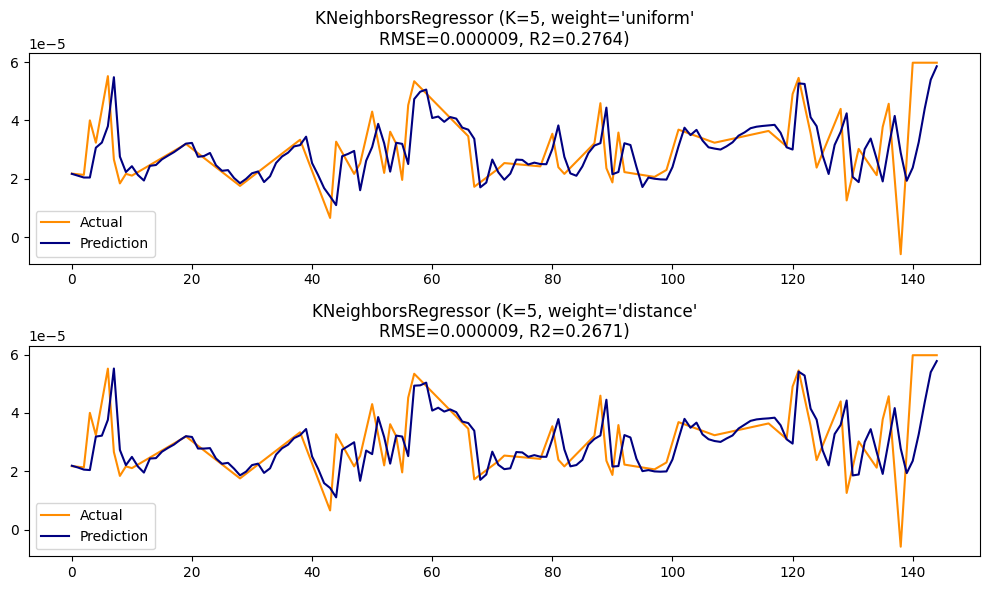

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = supervised[['NO2(t-4)', 'NO2(t-3)', 'NO2(t-2)', 'NO2(t-1)']]
y = supervised['NO2(t)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

n_neighbors = 5

plt.figure(figsize=(10, 6))

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    plt.subplot(2, 1, i + 1)
    plt.plot(range(len(y_test)), y_test, 'darkorange', label="Actual")
    plt.plot(range(len(y_pred)), y_pred, 'navy', label="Prediction")
    plt.title(f"KNeighborsRegressor (K={n_neighbors}, weight='{weights}'\nRMSE={rmse:.6f}, R2={r2:.4f})")
    plt.legend()
    plt.tight_layout()

plt.show()